<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_challenge_W7D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium

In [36]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode
options.add_argument("--no-sandbox")  # Bypass OS security model
options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
driver = webdriver.Chrome(options=options)

In [30]:
# Navigate to the weather forecast page of a specific city
url = 'https://www.bbc.com/weather/293397'
driver.get(url)

In [31]:
# Extract the HTML content after it’s fully loaded
html_content = driver.page_source

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

In [32]:
# Find the desired section
weather_markers = soup.find_all('div', class_='weathermap__marker__content')

# Initialize lists to store the extracted information
cities = []
temperatures = []

# Iterate over each weather marker to extract the desired information
for marker in weather_markers:
    # Extract date
    city_elem = marker.find('div', class_='weathermap__marker__content__title')
    cities.append(city_elem.text.strip() if city_elem else "N/A")

    # Extract temperature
    temp_elem = marker.find('span', class_='wr-c-map__temperature-c')
    temperatures.append(temp_elem.text.strip() if temp_elem else "N/A")

# Print the extracted information
for city, temperature in zip(cities, temperatures):
    print("City:", city)
    print("Temperature:", temperature)
    print("")

City: Tel Aviv
Temperature: 23

City: Tripoli
Temperature: 21

City: Tunis
Temperature: 21

City: Algiers
Temperature: 20

City: Palermo
Temperature: 21

City: Baghdad
Temperature: 31

City: Athens
Temperature: 22

City: Antalya
Temperature: 24

City: Ankara
Temperature: 23

City: Cairo
Temperature: 26

City: Riyadh
Temperature: 23

City: Tehrān
Temperature: 21

City: Ashgabat
Temperature: 25

City: Kuwait City
Temperature: 26

City: Dubai
Temperature: 27

City: Baku
Temperature: 18

City: Kandahār
Temperature: 21

City: Karachi
Temperature: 33



In [33]:
# Create a DataFrame
df = pd.DataFrame({"City": cities, "Temperature": temperatures})
df

,City,Temperature
0,Tel Aviv,23
1,Tripoli,21
2,Tunis,21
3,Algiers,20
4,Palermo,21
5,Baghdad,31
6,Athens,22
7,Antalya,24
8,Ankara,23
9,Cairo,26


In [35]:
# Convert temperature column to numeric
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

# Calculate average temperature
average_temperature = df['Temperature'].mean()

# Find highest and lowest temperatures
max_temperature = df['Temperature'].max()
min_temperature = df['Temperature'].min()

# Calculate temperature range
temperature_range = max_temperature - min_temperature

# Determine the number of cities with temperatures above a certain threshold
threshold = 25
cities_above_threshold = df[df['Temperature'] > threshold]['City'].count()

# Print the results
print("Average temperature:", average_temperature)
print("Highest temperature:", max_temperature)
print("Lowest temperature:", min_temperature)
print("Temperature range:", temperature_range)
print("Number of cities with temperatures above", threshold, "degrees Celsius:", cities_above_threshold)


Average temperature: 23.666666666666668
Highest temperature: 33
Lowest temperature: 18
Temperature range: 15
Number of cities with temperatures above 25 degrees Celsius: 5


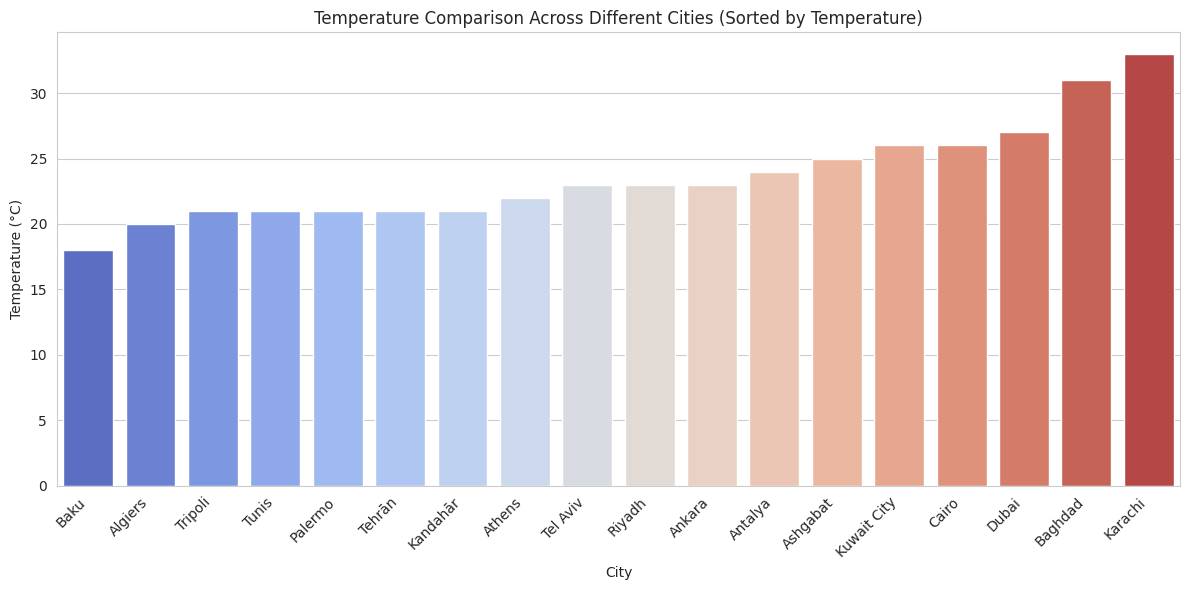

In [39]:
# Sort the DataFrame by temperature
df_sorted = df.sort_values(by='Temperature')

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='City', y='Temperature', hue='City', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Temperature Comparison Across Different Cities (Sorted by Temperature)')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()


**Report Summary:**

Methodology:

We began by scraping weather data from the BBC Weather webpage for various cities.
Selenium was used to interact with the webpage and BeautifulSoup to parse the HTML.
The extracted data included the city names and their corresponding temperatures.
We organized the scraped data into a Pandas DataFrame for further analysis.
Basic data analysis was performed, including calculating averages, finding the highest and lowest temperatures, and determining the number of cities with temperatures above a certain threshold.
Data visualization was carried out using Seaborn and Matplotlib to create visualizations for comparing temperatures across different cities.

A map with the names of the cities and the current temperature was examined.

A bar plot was created to visually compare temperatures across different cities, with cities organized from lower temperature to higher temperature.

Tel Aviv is in the middle of the temperature range. The temperature in TA was 20, while the average temperature of the sample is 23.

